<a href="https://colab.research.google.com/github/Rohan5076/Twitter-Sentiment-Analysis-analyticsvidhya/blob/main/Twitter_Sentiment_Analysis_analyticsvidhya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing req. Lib.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
#loading the data set
train=pd.read_csv("/content/drive/MyDrive/All CSV files-20220711T101939Z-001/tweet/train_E6oV3lV.csv")
test=pd.read_csv("/content/drive/MyDrive/All CSV files-20220711T101939Z-001/tweet/test_tweets_anuFYb8.csv")




In [3]:

train.shape,test.shape

((31962, 3), (17197, 2))

In [4]:
train["label"].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [5]:
train.info(),test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      17197 non-null  int64 
 1   tweet   17197 non-null  object
dtypes: int64(1), object(1)
memory usage: 268.8+ KB


(None, None)

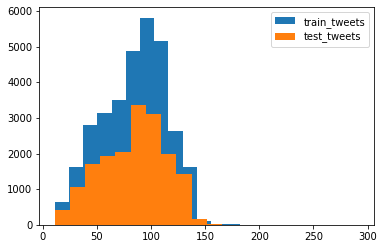

In [6]:
length_train=train['tweet'].str.len()
length_test=test['tweet'].str.len()
plt.hist(length_train,bins=20,label="train_tweets")
plt.hist(length_test,bins=20,label="test_tweets")
plt.legend()
plt.show()

In [7]:
data=train.append(test,ignore_index=True)
data.shape

(49159, 3)

Text(0.5, 1.0, 'Count of Type of Sentiment')

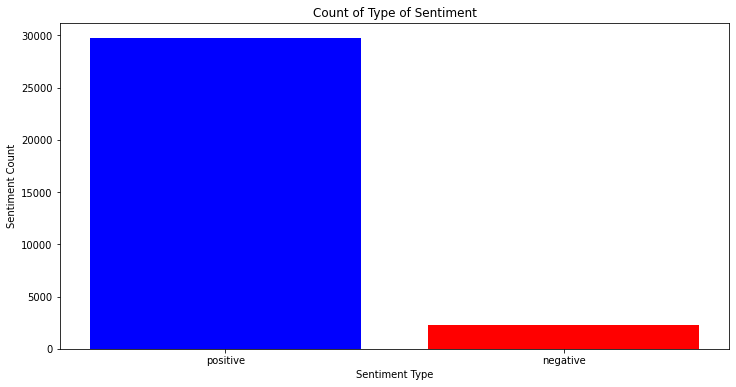

In [8]:
counter = data.label.value_counts()
index = [1,2]
plt.figure(1,figsize=(12,6))
plt.bar(index,counter,color=['blue','red',])
plt.xticks(index,['positive','negative'],rotation=0)
plt.xlabel('Sentiment Type')
plt.ylabel('Sentiment Count')
plt.title('Count of Type of Sentiment')

In [9]:
def remove_pattern(input_txt,pattern):
  r=re.findall(pattern,input_txt)
  for i in r:
    input_txt=re.sub(i,'',input_txt)
  return input_txt

In [10]:
data['clean_tweet']=np.vectorize(remove_pattern)(data['tweet'],"@[\w]*")
data.head()

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [11]:
def tweet_to_words(tweet):
    letters_only = re.sub("[^a-zA-Z#]", " ",tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words ))

In [12]:
nltk.download('stopwords')
data['clean_tweet']=data['clean_tweet'].apply(lambda x: tweet_to_words(x))
data['clean_tweet']=data['clean_tweet'].apply(lambda x:' '.join([w for w in x.split() if len(w)>3]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
data.head

<bound method NDFrame.head of           id  label                                              tweet  \
0          1    0.0   @user when a father is dysfunctional and is s...   
1          2    0.0  @user @user thanks for #lyft credit i can't us...   
2          3    0.0                                bihday your majesty   
3          4    0.0  #model   i love u take with u all the time in ...   
4          5    0.0             factsguide: society now    #motivation   
...      ...    ...                                                ...   
49154  49155    NaN  thought factory: left-right polarisation! #tru...   
49155  49156    NaN  feeling like a mermaid ð #hairflip #neverre...   
49156  49157    NaN  #hillary #campaigned today in #ohio((omg)) &am...   
49157  49158    NaN  happy, at work conference: right mindset leads...   
49158  49159    NaN  my   song "so glad" free download!  #shoegaze ...   

                                             clean_tweet  
0      father dysfunct

In [14]:
import pandas as pd
data.to_csv('clean_data.csv', index=False)

In [15]:
data.head()

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause offer wheelchair van...
2,3,0.0,bihday your majesty,bihday majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


#**Tokenization**
Tokenization means splitting text into meaningful unit words. There are sentence tokenizers as well as word tokenizers.

Sentence tokenizer splits a paragraph into meaningful sentences, while word tokenizer splits a sentence into unit meaningful words. Many libraries can perform tokenization like SpaCy, NLTK, and TextBlob.

Splitting a sentence on space to get individual unit words can be understood as tokenization.

In [16]:
%%time
tokenized_tweet=data["clean_tweet"].apply(lambda x: x.split())
tokenized_tweet.head()

CPU times: user 123 ms, sys: 11 ms, total: 134 ms
Wall time: 154 ms


0    [father, dysfunctional, selfish, drags, kids, ...
1    [thanks, #lyft, credit, cause, offer, wheelcha...
2                                    [bihday, majesty]
3                           [#model, love, take, time]
4                   [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

#**Stemming**
Stemming is converting words into their root word using some set of rules irrespective of meaning. I.e.,

* “fish,” “fishes,” and “fishing” are stemmed into “fish”.
* “playing”, “played”,” plays” are stemmed into “play”.
* Stemming helps to reduce the vocabulary hence improving the accuracy.

The simplest way to perform stemming is to use NLTK or a TextBlob library.

NLTK provides various stemming techniques, i.e. Snowball, PorterStemmer; different technique follows different sets of rules to convert words into their root word

In [17]:
%%time
import nltk
# “article” is stemmed into “articl“, “lives“ — -> “live“.
from nltk.stem import PorterStemmer
steamer = PorterStemmer()
tokenized_tweet=tokenized_tweet.apply(lambda x:[steamer.stem(i) for i in x]) #steaming

CPU times: user 10.3 s, sys: 61.3 ms, total: 10.3 s
Wall time: 13.8 s


In [18]:
%%time
for i in range(len(tokenized_tweet)):
  tokenized_tweet[i]=' '.join(tokenized_tweet[i])
data['clean_tweet']=tokenized_tweet

CPU times: user 306 ms, sys: 1.01 ms, total: 307 ms
Wall time: 308 ms


In [19]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS  
import matplotlib.pyplot as plt


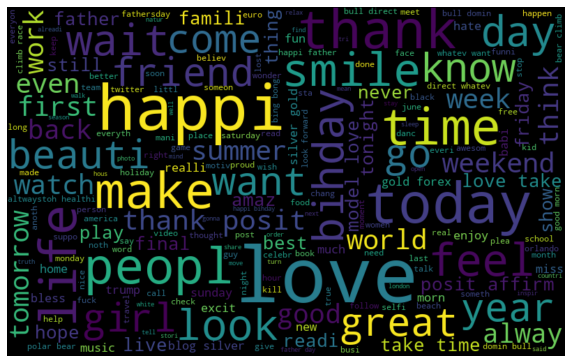

CPU times: user 2.68 s, sys: 59.1 ms, total: 2.73 s
Wall time: 2.75 s


In [20]:
%%time
all_words=' '.join([text for text in data['clean_tweet']])
wordcloud = WordCloud(width = 800, height = 500,random_state=21,max_font_size=110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

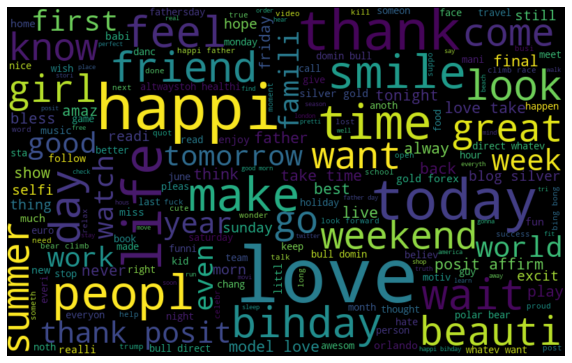

CPU times: user 1.9 s, sys: 25.2 ms, total: 1.93 s
Wall time: 1.94 s


In [21]:
%%time
normal_words=' '.join([text for text in data['clean_tweet'][data['label']==0]])
wordcloud = WordCloud(width = 800, height = 500,random_state=21,max_font_size=110).generate(normal_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

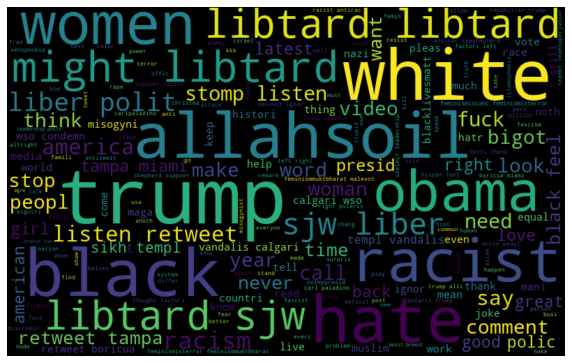

CPU times: user 741 ms, sys: 109 ms, total: 850 ms
Wall time: 850 ms


In [22]:
%%time
negative_words=' '.join([text for text in data['clean_tweet'][data['label']==1]])
wordcloud = WordCloud(width = 800, height = 500,random_state=21,max_font_size=110).generate(negative_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [23]:
#function to collect hashtag
def hashtag_extract(x):
  hashtag=[]
  #loop over the words in the tweet 
  for i in x:
    ht=re.findall(r"#(\w+)",i)
    hashtag.append(ht)
  return hashtag

In [24]:
# extracting hastags from non racist/sexist tweets
HT_regular=hashtag_extract(data['tweet'][data['label']==0])  
# extracting hastags from non racist/sexist tweets
HT_negative=hashtag_extract(data['tweet'][data['label']==1])  
#unnesting list
HT_regular=sum(HT_regular,[]) 
HT_negative=sum(HT_negative,[])

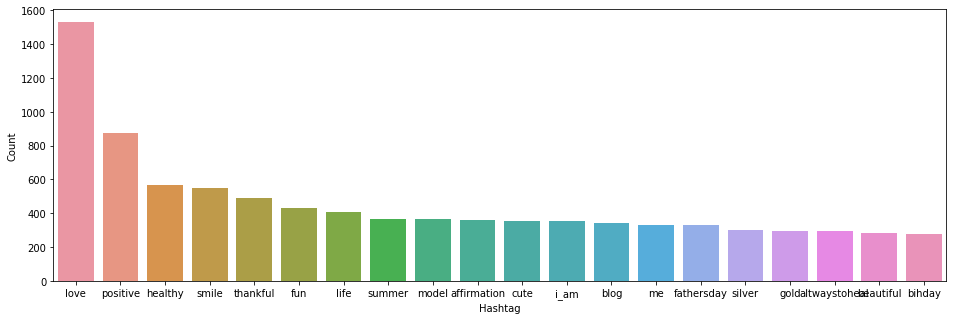

CPU times: user 245 ms, sys: 1 ms, total: 246 ms
Wall time: 250 ms


In [25]:
%%time
a=nltk.FreqDist(HT_regular)
d=pd.DataFrame({'Hashtag':list(a.keys()),'Count':list(a.values())})
#selecting top 20 most fequesnt hastags
e = d.nlargest(columns="Count",n=20)
plt.figure(figsize=(16,5))
ax=sns.barplot(data=e,x="Hashtag",y="Count")
ax.set(ylabel='Count')
plt.show()

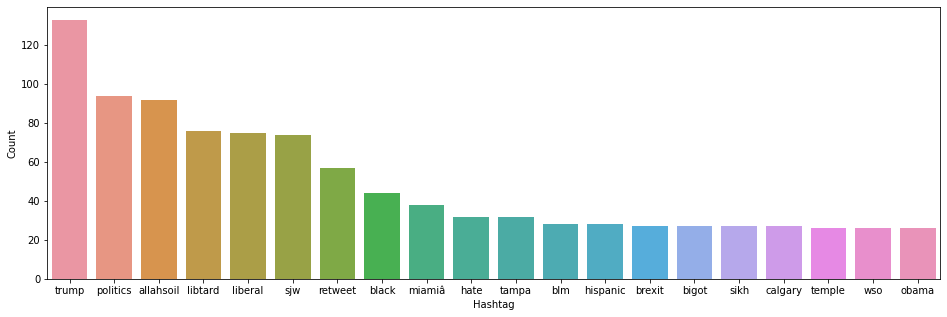

CPU times: user 187 ms, sys: 2.92 ms, total: 190 ms
Wall time: 191 ms


In [26]:
%%time
b=nltk.FreqDist(HT_negative)
g=pd.DataFrame({'Hashtag':list(b.keys()),'Count':list(b.values())})
#selecting top 20 most fequesnt hastags
f=g.nlargest(columns="Count",n=20)
plt.figure(figsize=(16,5))
ax=sns.barplot(data=f,x="Hashtag",y="Count")
ax.set(ylabel='Count')
plt.show()

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import gensim

In [28]:
bow_vectorizer=CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
bow=bow_vectorizer.fit_transform(data['clean_tweet'])
bow.shape

(49159, 1000)

In [29]:
data.count

<bound method DataFrame.count of           id  label                                              tweet  \
0          1    0.0   @user when a father is dysfunctional and is s...   
1          2    0.0  @user @user thanks for #lyft credit i can't us...   
2          3    0.0                                bihday your majesty   
3          4    0.0  #model   i love u take with u all the time in ...   
4          5    0.0             factsguide: society now    #motivation   
...      ...    ...                                                ...   
49154  49155    NaN  thought factory: left-right polarisation! #tru...   
49155  49156    NaN  feeling like a mermaid ð #hairflip #neverre...   
49156  49157    NaN  #hillary #campaigned today in #ohio((omg)) &am...   
49157  49158    NaN  happy, at work conference: right mindset leads...   
49158  49159    NaN  my   song "so glad" free download!  #shoegaze ...   

                                             clean_tweet  
0         father dy

In [30]:
tfidf_vectorizer=TfidfVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
tfidf=tfidf_vectorizer.fit_transform(data['clean_tweet'])
tfidf.shape

(49159, 1000)

In [39]:
tokenized_tweet = data['clean_tweet'].apply(lambda x: x.split()) # tokenizing 
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34) 

model_w2v.train(tokenized_tweet, total_examples= len(data['clean_tweet']), epochs=20)


(5809691, 6601800)

In [40]:
model_w2v.wv.most_similar(positive="dinner")

[('#biall', 0.605832040309906),
 ('burrito', 0.56928950548172),
 ('lukey', 0.563971996307373),
 ('#foodcoma', 0.5609738826751709),
 ('noodl', 0.5491804480552673),
 ('#burrito', 0.5491503477096558),
 ('fav', 0.5489397644996643),
 ('kayak', 0.5475649237632751),
 ('#cellar', 0.5439932942390442),
 ('#schoolreunion', 0.5424391031265259)]

In [41]:
model_w2v.wv.most_similar(positive="trump")

[('donald', 0.6297267079353333),
 ('melo', 0.5362982749938965),
 ('#delegaterevolt', 0.5359312295913696),
 ('quaint', 0.5343492031097412),
 ('#republican', 0.5296483635902405),
 ('jibe', 0.5284111499786377),
 ('tomlin', 0.5269964933395386),
 ('phoni', 0.5244404077529907),
 ('unstabl', 0.5234851837158203),
 ('endors', 0.5216436982154846)]

In [42]:
model_w2v["food"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 1.1282021 , -0.6878769 , -0.33588615,  0.11015517,  0.0406314 ,
        0.98993415, -0.62194103, -0.10322916,  0.21971536,  0.4443913 ,
        0.45971954, -0.1725986 ,  0.34164616,  0.08056759, -0.32323584,
        0.15079185,  0.08129902,  0.7904563 ,  0.27329254, -0.1140302 ,
        0.17530103,  0.3629468 , -0.91392547, -0.28403193,  0.1248168 ,
       -0.27786446, -0.5923421 ,  0.22606707, -0.4192034 , -0.03834701,
       -0.36201653,  0.08036589,  0.02505895,  0.4143055 , -0.2672254 ,
        0.02055438, -0.5011543 , -0.67141926, -0.46260434,  0.07363868,
        0.23953567, -0.70036757,  0.7658234 , -0.05850469,  0.03678506,
       -0.05742801,  0.08111469,  0.40606177,  0.67651767,  0.13420641,
       -0.0609198 ,  0.3312007 ,  0.41229925,  0.34451124,  0.9586434 ,
       -0.5662852 ,  0.1460065 ,  0.00125422, -0.60239637, -0.30233726,
       -0.12815177, -0.16549094,  0.12715904, -0.33045802,  0.95025665,
        0.19075035, -0.43029878,  0.5027511 ,  0.50077724,  0.21

In [43]:
len(model_w2v['food'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


200

In [44]:
def word_vector(tokens,size):
  vec=np.zeros(size).reshape((1,size))
  count=0
  for word in tokens:
    try:
      vec+=model_w2v[word].reshape((1,size))
      count+=1
    except KeyError:   # handling the case where the token is not in the vocabulary
       continue
  
  if count != 0:
    vec/= count
  return vec

  


preparing word2vec feature set...

In [45]:
wordvec_arrays=np.zeros((len(tokenized_tweet),200))
for i in range(len(tokenized_tweet)):
  wordvec_arrays[i,:]=word_vector(tokenized_tweet[i],200)
  wordvec_df=pd.DataFrame(wordvec_arrays)
wordvec_df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(49159, 200)

In [46]:
from tqdm import tqdm
tqdm.pandas(desc="progress- bar")
from gensim.models.doc2vec import LabeledSentence

In [47]:
def add_label(twt):
  output =[]
  for i,s in zip (twt.index,twt):
    output.append(LabeledSentence(s,["tweet_"+str(i)]))
  return output
labeled_tweets=add_label(tokenized_tweet)#label all the tweets

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  after removing the cwd from sys.path.


In [48]:
labeled_tweets[:6]

[LabeledSentence(words=['father', 'dysfunct', 'selfish', 'drag', 'kid', 'dysfunct', '#run'], tags=['tweet_0']),
 LabeledSentence(words=['thank', '#lyft', 'credit', 'caus', 'offer', 'wheelchair', 'van', '#disapoint', '#getthank'], tags=['tweet_1']),
 LabeledSentence(words=['bihday', 'majesti'], tags=['tweet_2']),
 LabeledSentence(words=['#model', 'love', 'take', 'time'], tags=['tweet_3']),
 LabeledSentence(words=['factsguid', 'societi', '#motiv'], tags=['tweet_4']),
 LabeledSentence(words=['huge', 'fare', 'talk', 'leav', 'chao', 'disput', '#allshowandnogo'], tags=['tweet_5'])]

In [54]:
model_d2v=gensim.models.Doc2Vec(dm=1, #dm=1 for "distributed memory model"
                                dm_mean=1,#dm=1 for using mean of the context word vectors
                                vector_size=200, #no.of desired features
                                window=5,#width of the context window
                                negative=7,#if>0 then negative sampling will be used
                                min_counts=5,#ignores all words with total frequency lower than 2
                                workers=3, # no. of cores
                                alpha=0.1, #learning rate
                                seed=23)
model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])
model_d2v.train(labeled_tweets,total_examples=len(data['clean_tweet']),epochs=15)


100%|██████████| 49159/49159 [00:00<00:00, 3315769.17it/s]


In [50]:
docvec_arrays= np.zeros((len(tokenized_tweet),200))
for i in range (len(data)):
  docvec_arrays[i,:]= model_d2v.docvecs[i].reshape((1,200))
docvec_df=pd.DataFrame(docvec_arrays)
docvec_df.shape

(49159, 200)

# **Logistic Regression**

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [53]:
# Extracting train and test BoW features 
train_bow=bow[:31962,:]
test_bow=bow[31962:,:]
#splitting data into training and validation set
xtrain_bow,xvalid_bow,ytrain,yvalid=train_test_split(train_bow,train['label'],random_state=42,test_size=0.3)
lreg=LogisticRegression()
#training the model
lreg.fit(xtrain_bow,ytrain)
prediction=lreg.predict_proba(xvalid_bow)   #predicting on the validtaion set 
prediction_int=prediction[:,1]>=0.3 #if prediction is greater than or equal to 0.3 than 1 or else 0
prediction_int .astype(int)
f1_score(yvalid,prediction_int) #calculationg prediction for validation set

0.5345545378850958

now lets make prediction for the test dataset and create a submision file

In [56]:
test_pred=lreg.predict_proba(test_bow)
test_pred_int=test_pred[:,1]>=0.3
test_pred_int=test_pred_int.astype(int)
test['label']=test_pred_int
submission=test[['id','label']]
submission.to_csv('sub_lreg_bow.csv',index=False) #writing data to a csv file

**TF-IDF Features**

we'll follow the same steps as above,but now for the TF-IDF features set.

In [57]:
train_tfidf=tfidf[:31962,:]
test_tfidf=tfidf[31962:,:]
xtrain_tfidf=train_tfidf[ytrain.index]
xvalid_tfidf=train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf,ytrain)
prediction=lreg.predict_proba(xvalid_tfidf)
prediction_int=prediction[:,1]>=0.3
prediction_int=prediction_int.astype(int)
f1_score(yvalid,prediction_int)#calculating f1 score for the validation set

0.5464190981432361

**word2vec features**

In [58]:
train_w2v=wordvec_df.iloc[:31962,:]
test_w2v=wordvec_df.iloc[31962:,:]
xtrain_w2v=train_w2v.iloc[ytrain.index]
xvalid_w2v=train_w2v.iloc[yvalid.index]

lreg.fit(xtrain_w2v,ytrain)
prediction=lreg.predict_proba(xvalid_w2v)
prediction_int=prediction[:,1]>=0.3
prediction_int=prediction_int.astype(int)
f1_score(yvalid,prediction_int)#calculating f1 score for the validation set

0.6071689831748355

**Doc2Vec Features**

In [59]:
train_d2v=docvec_df.iloc[:31962,:]
test_d2v=docvec_df.iloc[31962:,:]
xtrain_d2v=train_d2v.iloc[ytrain.index]
xvalid_d2v=train_d2v.iloc[yvalid.index]

lreg.fit(xtrain_d2v,ytrain)
prediction=lreg.predict_proba(xvalid_d2v)
prediction_int=prediction[:,1]>=0.3
prediction_int=prediction_int.astype(int)
f1_score(yvalid,prediction_int)#calculating f1 score for the validation set

0.3867595818815331

#**SVM**

In [60]:
from sklearn import svm

# **BAG WORD FEATURES**

In [61]:
svc = svm.SVC(kernel='linear',C=1,probability=True).fit(xtrain_bow, ytrain)
prediction=svc.predict_proba(xvalid_bow)
prediction_int=prediction[:,1]>0.3
prediction_int=prediction_int.astype(int)
f1_score(yvalid,prediction_int)

0.505639097744361

In [62]:
test_pred=svc.predict_proba(test_bow)
test_pred_int=test_pred[:,1]>=0.3
test_pred_int=test_pred_int.astype(int)
test['label']=test_pred_int
submission=test[['id','label']]
submission.to_csv('sub_svm_bow.csv',index=False) #writing data to a csv file

#**TF-IDF Features**


In [63]:
svc = svm.SVC(kernel='linear',C=1,probability=True).fit(xtrain_bow, ytrain)
prediction=svc.predict_proba(xvalid_tfidf)
prediction_int=prediction[:,1]>0.3
prediction_int=prediction_int.astype(int)
f1_score(yvalid,prediction_int)

0.4460732984293194

#**word2vec Features** 

In [65]:
svc = svm.SVC(kernel='linear',C=1,probability=True).fit(xtrain_w2v, ytrain)
prediction=svc.predict_proba(xvalid_w2v)
prediction_int=prediction[:,1]>0.3
prediction_int=prediction_int.astype(int)
f1_score(yvalid,prediction_int)

0.6051202482544609

In [66]:
svc = svm.SVC(kernel='linear',C=1,probability=True).fit(xtrain_d2v, ytrain)
prediction=svc.predict_proba(xvalid_d2v)
prediction_int=prediction[:,1]>0.3
prediction_int=prediction_int.astype(int)
f1_score(yvalid,prediction_int)

0.20462046204620463

#**Random Forest Classifier**

In [67]:
from sklearn.ensemble import RandomForestClassifier

##**bag of word features**

first we will train our Random Forest model on the bag of words features and check its performance on both validation set and public leaderboard

In [68]:
p=RandomForestClassifier(n_estimators = 400,random_state=11)
rf=p.fit(xtrain_bow,ytrain)
prediction=rf.predict(xvalid_bow)
#validation score
f1_score(yvalid,prediction)

0.5532591414944356

In [69]:
test_pred=rf.predict(test_bow)
test['label']=test_pred
submission=test[['id','label']]
submission.to_csv('sub_rf_bow.csv',index=False)

##**TF-IDF Features**

In [70]:
rf=RandomForestClassifier(n_estimators = 400,random_state=11).fit(xtrain_tfidf,ytrain)
prediction=rf.predict(xvalid_tfidf)
#validation score
f1_score(yvalid,prediction)

0.5546372819100092

##**Word2Vec Featues**

In [71]:
rf=RandomForestClassifier(n_estimators = 400,random_state=11).fit(xtrain_w2v,ytrain)
prediction=rf.predict(xvalid_w2v)
#validation score
f1_score(yvalid,prediction)

0.519453207150368

##**doc2vec features**

In [72]:
rf=RandomForestClassifier(n_estimators = 400,random_state=11).fit(xtrain_d2v,ytrain)
prediction=rf.predict(xvalid_d2v)
#validation score
f1_score(yvalid,prediction)

0.06779661016949151

# **XG-Boost model**

In [73]:
from xgboost import XGBClassifier

##**bag of word features**

In [74]:
xgb_model=XGBClassifier(n_estimators = 1000,max_depth=6).fit(xtrain_bow,ytrain)
prediction=xgb_model.predict(xvalid_bow)
#validation score
f1_score(yvalid,prediction)

0.5125725338491297

In [75]:
test_pred=xgb_model.predict(test_bow)
test['label']=test_pred
submission=test[['id','label']]
submission.to_csv('sub_xgb_bow.csv',index=False)

##**TF-IDF FEATURES**

In [76]:
xgb=XGBClassifier(n_estimators = 1000,max_depth=6).fit(xtrain_tfidf,ytrain)
prediction=xgb.predict(xvalid_tfidf)
#validation score
f1_score(yvalid,prediction)

0.5181644359464628

##**Word2Vec features**

In [77]:
xgb=XGBClassifier(n_estimators = 1000,max_depth=6,nthread=3).fit(xtrain_w2v,ytrain)
prediction=xgb.predict(xvalid_w2v)
#validation score
f1_score(yvalid,prediction)

0.6431159420289855

##**Doc2Vec Features**

In [78]:
xgb=XGBClassifier(n_estimators = 1000,max_depth=6,nthread=3).fit(xtrain_d2v,ytrain)
prediction=xgb.predict(xvalid_d2v)
#validation score
f1_score(yvalid,prediction)

0.3515016685205784

#**Fine tunning XGBoost + Word2Vec**

In [79]:
import xgboost as xgb

In [80]:
dtrain = xgb.DMatrix(xtrain_w2v, label=ytrain) 
dvalid = xgb.DMatrix(xvalid_w2v, label=yvalid) 
dtest = xgb.DMatrix(test_w2v)

In [81]:
# Parameters that we are going to tune 
params = {
    'objective':'binary:logistic',
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1
 }

we will create custom evaluation metric to calculate f1 score

In [85]:
def custom_eval(preds, dtrain):
    labels = dtrain.get_label().astype(int)
    preds = (preds >= 0.3).astype(int)
    return [('f1_score', f1_score(labels, preds))]

# **Tuning max_depth and min_child_weight**

In [86]:
#Tuning max_depth and min_child_weight

gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(6,10)
     for min_child_weight in range(5,8)
 ]

In [87]:
%%time
max_f1 = 0. # initializing with 0 
best_params = None 
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
     # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight

     # Cross-validation
    cv_results = xgb.cv(        params,
        dtrain,        feval= custom_eval,
        num_boost_round=200,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=10
    )
    # Finding best F1 Score
    
    mean_f1 = cv_results['test-f1_score-mean'].max()
    
    boost_rounds = cv_results['test-f1_score-mean'].argmax()    
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))    
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (max_depth,min_child_weight)

print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))


CV with max_depth=6, min_child_weight=5
	F1 Score 0.6845328 for 90 rounds
CV with max_depth=6, min_child_weight=6
	F1 Score 0.6732798 for 47 rounds
CV with max_depth=6, min_child_weight=7
	F1 Score 0.6793319999999999 for 51 rounds
CV with max_depth=7, min_child_weight=5
	F1 Score 0.6793536 for 57 rounds
CV with max_depth=7, min_child_weight=6
	F1 Score 0.6808690000000001 for 40 rounds
CV with max_depth=7, min_child_weight=7
	F1 Score 0.6928506000000001 for 52 rounds
CV with max_depth=8, min_child_weight=5
	F1 Score 0.6702390000000001 for 27 rounds
CV with max_depth=8, min_child_weight=6
	F1 Score 0.6827056 for 73 rounds
CV with max_depth=8, min_child_weight=7
	F1 Score 0.6873246 for 54 rounds
CV with max_depth=9, min_child_weight=5
	F1 Score 0.6790458 for 49 rounds
CV with max_depth=9, min_child_weight=6
	F1 Score 0.6888403999999999 for 81 rounds
CV with max_depth=9, min_child_weight=7
	F1 Score 0.6865588 for 52 rounds
Best params: 7, 7, F1 Score: 0.6928506000000001
CPU times: user 33m

##updating max_depth and min_child_weight parameters.

In [88]:
#Updating max_depth and min_child_weight parameters.

params['max_depth'] = 7 
params['min_child_weight'] = 6

#**Tunning subsample and colsample**

In [89]:
%%time
#Tuning subsample and colsample

gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(5,10)]
    for colsample in [i/10. for i in range(5,10)] ]
max_f1 = 0. 
best_params = None 
for subsample, colsample in gridsearch_params:
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
     # Update our parameters
    params['colsample'] = colsample
    params['subsample'] = subsample
    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=200,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=10
    )
     # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].argmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (subsample, colsample) 

print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))


CV with subsample=0.5, colsample=0.5
	F1 Score 0.6679049999999999 for 62 rounds
CV with subsample=0.5, colsample=0.6
	F1 Score 0.6679049999999999 for 62 rounds
CV with subsample=0.5, colsample=0.7
	F1 Score 0.6679049999999999 for 62 rounds
CV with subsample=0.5, colsample=0.8
	F1 Score 0.6679049999999999 for 62 rounds
CV with subsample=0.5, colsample=0.9
	F1 Score 0.6679049999999999 for 62 rounds
CV with subsample=0.6, colsample=0.5
	F1 Score 0.6492574 for 27 rounds
CV with subsample=0.6, colsample=0.6
	F1 Score 0.6492574 for 27 rounds
CV with subsample=0.6, colsample=0.7
	F1 Score 0.6492574 for 27 rounds
CV with subsample=0.6, colsample=0.8
	F1 Score 0.6492574 for 27 rounds
CV with subsample=0.6, colsample=0.9
	F1 Score 0.6492574 for 27 rounds
CV with subsample=0.7, colsample=0.5
	F1 Score 0.6771157999999999 for 66 rounds
CV with subsample=0.7, colsample=0.6
	F1 Score 0.6771157999999999 for 66 rounds
CV with subsample=0.7, colsample=0.7
	F1 Score 0.6771157999999999 for 66 rounds
CV wi

# updating subsample and colsample_bytree

In [90]:
#Updating subsample and colsample_bytree

params['subsample'] = .8
params['colsample_bytree'] = .5

#**Now lets tune learning rate**

In [91]:
%%time
# Now let’s tune the learning rate.
max_f1 = 0. 
best_params = None 
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
     # Update ETA
    params['eta'] = eta

     # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=1000,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=20
    )

     # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].argmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = eta 
print("Best params: {}, F1 Score: {}".format(best_params, max_f1))


CV with eta=0.3
	F1 Score 0.6780088000000001 for 87 rounds
CV with eta=0.2
	F1 Score 0.6774158 for 71 rounds
CV with eta=0.1
	F1 Score 0.6893853999999999 for 143 rounds
CV with eta=0.05
	F1 Score 0.6819991999999999 for 177 rounds
CV with eta=0.01
	F1 Score 0.1302024 for 0 rounds
CV with eta=0.005
	F1 Score 0.1302024 for 0 rounds
Best params: 0.1, F1 Score: 0.6893853999999999
CPU times: user 12min 40s, sys: 4.8 s, total: 12min 44s
Wall time: 6min 51s


In [92]:
params['eta'] = .1

# Let’s have a look at the final list of tuned parameters.

In [93]:
params
{'colsample': 0.8,
 'colsample_bytree': 0.5, 'eta': 0.1,
 'max_depth': 7, 'min_child_weight': 6,
 'objective': 'binary:logistic',
 'subsample': 0.8}

{'colsample': 0.8,
 'colsample_bytree': 0.5,
 'eta': 0.1,
 'max_depth': 7,
 'min_child_weight': 6,
 'objective': 'binary:logistic',
 'subsample': 0.8}

In [94]:
%%time
xgb_model = xgb.train(
    params,
    dtrain,
    feval= custom_eval,
    num_boost_round= 1000,
    maximize=True,
    evals=[(dvalid, "Validation")],
    early_stopping_rounds=10
 )

[0]	Validation-error:0.065179	Validation-f1_score:0.133165
Multiple eval metrics have been passed: 'Validation-f1_score' will be used for early stopping.

Will train until Validation-f1_score hasn't improved in 10 rounds.
[1]	Validation-error:0.056523	Validation-f1_score:0.133165
[2]	Validation-error:0.056523	Validation-f1_score:0.133165
[3]	Validation-error:0.056315	Validation-f1_score:0.133165
[4]	Validation-error:0.055793	Validation-f1_score:0.133165
[5]	Validation-error:0.05475	Validation-f1_score:0.375489
[6]	Validation-error:0.054542	Validation-f1_score:0.473157
[7]	Validation-error:0.05475	Validation-f1_score:0.534531
[8]	Validation-error:0.053916	Validation-f1_score:0.570881
[9]	Validation-error:0.053916	Validation-f1_score:0.58299
[10]	Validation-error:0.05329	Validation-f1_score:0.590545
[11]	Validation-error:0.052977	Validation-f1_score:0.600297
[12]	Validation-error:0.052456	Validation-f1_score:0.592819
[13]	Validation-error:0.052143	Validation-f1_score:0.597362
[14]	Valida

# Let’s prepare one final predicion file.

In [96]:
test_pred = xgb_model.predict(dtest) 
test['label'] = (test_pred >= 0.3).astype(int) 
submission = test[['id','label']] 
submission.to_csv('sub_xgb_w2v_finetuned.csv', index=False)

In [97]:
submission

,id,label
0,31963,0
1,31964,0
2,31965,0
3,31966,0
4,31967,0
...,...,...
17192,49155,1
17193,49156,0
17194,49157,1
17195,49158,0


# **Summary**

initially we cleaned our raw text data, then we created about 4 different types of feature-set that we can extract from any text data, and finally we used these feature-sets to build models for sentiment analysis. Below is a summary table showing F1 scores for different models and feature-sets.

Word2Vec features turned out to be most useful. Whereas XGBoost with Word2Vec features was the best model for this problem. This clearly shows the power of word embeddings in dealing with NLP problems.